In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# code directly from https://github.com/DTrimarchi10/confusion_matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

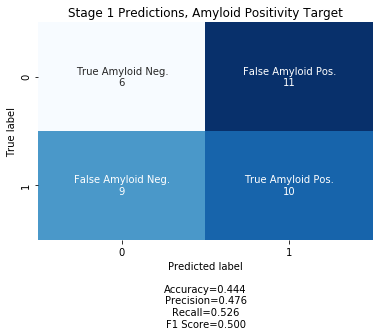

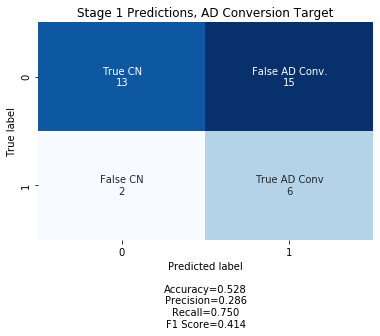

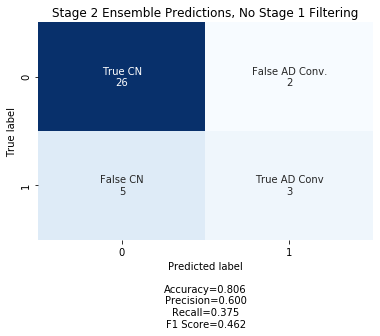

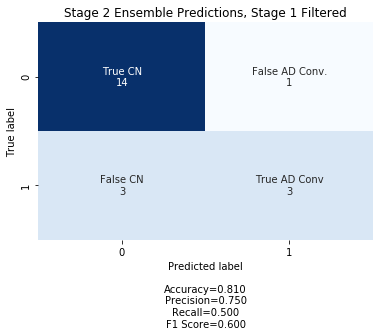

In [59]:
final_preds = pd.read_csv('C:/Users/Ben/Desktop/ADNI/processed_data/final_preds.csv')
# make amyloid confusion matrices
amyloid_labels = ['True Amyloid Neg.', 'False Amyloid Pos.', 'False Amyloid Neg.', 'True Amyloid Pos.']
conf1 = confusion_matrix(final_preds['amyloid_pos'], final_preds['stage1_pred'])
make_confusion_matrix(conf1, cbar=False, percent=False, group_names=amyloid_labels, title='Stage 1 Predictions, Amyloid Positivity Target')
plt.savefig('../figures/stage_1_preds_amyloid_target.png')

# alternative amyloid target
labels = ['True CN', 'False AD Conv.', 'False CN', 'True AD Conv']
conf2 = confusion_matrix(final_preds['AD_Conv'], final_preds['stage1_pred'])
make_confusion_matrix(conf2, cbar=False, percent=False, group_names=labels, title='Stage 1 Predictions, AD Conversion Target')
plt.savefig('../figures/stage_1_preds_ad_conv_target.png')

# make CNN ensemble confusion matrices
conf3 = confusion_matrix(final_preds['AD_Conv'], final_preds['MRI_PET_Ensemble'])
make_confusion_matrix(conf3, cbar=False, percent=False, group_names=labels, title='Stage 2 Ensemble Predictions, No Stage 1 Filtering')
plt.savefig('../figures/stage_2_ensemble_preds_no_filtering.png')

final_preds_filtered = final_preds[final_preds['stage1_pred'] == 1]
conf4 = confusion_matrix(final_preds_filtered['AD_Conv'], final_preds_filtered['MRI_PET_Ensemble'])
make_confusion_matrix(conf4, cbar=False, percent=False, group_names=labels, title='Stage 2 Ensemble Predictions, Stage 1 Filtered')
plt.savefig('../figures/stage_2_ensemble_preds_filtered.png')